In [ ]:
#loading the data set
import pandas as pd
df=pd.read_csv(r"D:\4th year project\data analytics intern\chocolate data set.csv")
df.head()
df.shape
df.columns
df.info()    
df.describe()

In [13]:
#checking for missing values
df.isnull().sum()
#locating the missing value
df[df['Boxes Shipped'].isnull()]
#filling the misssing values with medain
df['Boxes Shipped'] = df['Boxes Shipped'].fillna(df['Boxes Shipped'].median())

#checking for duplicate value
df.duplicated().sum()
#checking the data types
df.dtypes
#date format
df['Date'].head()

0    04-01-2022
1    01-08-2022
2    07-07-2022
3    27-04-2022
4    24-02-2022
Name: Date, dtype: object

In [12]:
#checking the country wise sales sum.
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
df['Amount'] = df['Amount'].astype(float)
df.groupby("Country")["Amount"].sum().sort_values(ascending=False)


Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [75]:
#sharing the data to new csv file.
df.to_csv(r"D:\4th year project\data analytics intern\chocolate_data_cleaned.csv", index=False)

In [6]:
#working on the new cleaned csv file.
dg=pd.read_csv(r"D:\4th year project\data analytics intern\chocolate_data_cleaned.csv")
dg.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-01-2022,"$5,320.00",180.0
1,Van Tuxwell,India,85% Dark Bars,01-08-2022,"$7,896.00",91.0
2,Gigi Bohling,India,Peanut Butter Cubes,07-07-2022,"$4,501.00",137.0
3,Jan Morforth,Australia,Peanut Butter Cubes,27-04-2022,"$12,726.00",342.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-02-2022,"$13,685.00",184.0


In [11]:
#product wise sales
dg['Amount'] = dg['Amount'].replace('[\$,]', '', regex=True)
dg['Amount'] = dg['Amount'].astype(float)
dg.groupby("Product")["Amount"].sum()

Product
50% Dark Bites          1087659.35
70% Dark Bites           677346.22
85% Dark Bars            955268.24
99% Dark & Pure          960033.45
After Nines              837215.67
Almond Choco             890454.65
Baker's Choco Chips      799085.67
Caramel Stuffed Bars     742516.15
Choco Coated Almonds     773062.91
Drinking Coco            822245.57
Eclairs                  996947.96
Fruit & Nut Bars         829278.96
Manuka Honey Choco       885208.03
Milk Bars                866273.62
Mint Chip Choco          904989.55
Orange Choco             824070.85
Organic Choco Syrup      945345.73
Peanut Butter Cubes     1036591.09
Raspberry Choco          845388.41
Smooth Sliky Salty      1120201.09
Spicy Special Slims      938131.69
White Choc              1054257.00
Name: Amount, dtype: float64

In [10]:
#checking the sales according to the sales by sales person.
dg['Amount'] = dg['Amount'].replace('[\$,]', '', regex=True)
dg['Amount'] = dg['Amount'].astype(float)
dg.groupby("Sales Person")["Amount"].sum()


Sales Person
Andria Kimpton          648214.81
Barr Faughny            830826.91
Beverie Moffet          892421.37
Brien Boise             997326.48
Camilla Castle          628613.13
Ches Bonnell           1022599.96
Curtice Advani          691797.92
Dennison Crosswaite     931849.57
Dotty Strutley          608101.17
Gigi Bohling            742296.51
Gunar Cockshoot         762283.43
Husein Augar            656149.73
Jan Morforth            706585.50
Jehu Rudeforth          708505.03
Kaine Padly             849062.76
Karlen McCaffrey        713832.64
Kelci Walkden          1002929.10
Madelene Upcott        1010028.72
Mallorie Waber          642903.33
Marney O'Breen          836427.63
Oby Sorrel             1017204.12
Rafaelita Blaksland     668865.45
Roddy Speechley         808359.58
Van Tuxwell             974425.09
Wilone O'Kielt          439961.92
Name: Amount, dtype: float64

In [85]:
#month wise sales analysis.
dg['Date'] = pd.to_datetime(dg['Date'], dayfirst=True)
dg['Date'] = pd.to_datetime(dg['Date'])
dg['Month'] = dg['Date'].dt.month
dg.groupby("Month")["Amount"].sum()


Month
1    2868712.59
2    2232096.90
3    2404769.29
4    2161927.22
5    2415750.57
6    2773931.94
7    2567532.29
8    2366851.06
Name: Amount, dtype: float64

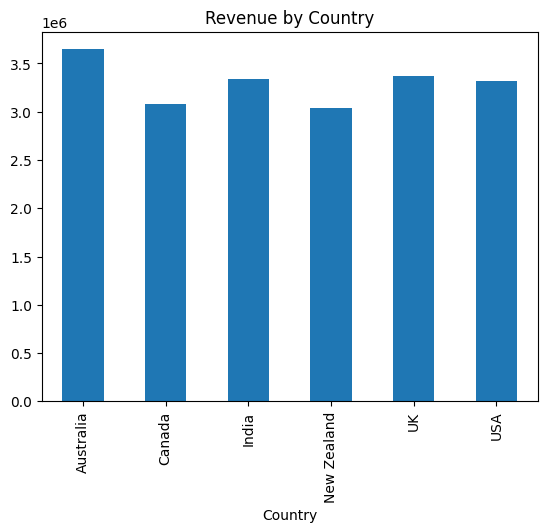

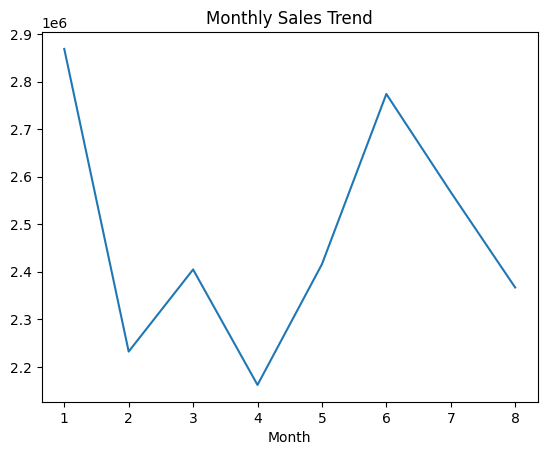

In [89]:
import matplotlib.pyplot as plt

dg.groupby("Country")["Amount"].sum().plot(kind='bar')
plt.title("Revenue by Country")
plt.show()
dg.groupby("Month")["Amount"].sum().plot()
plt.title("Monthly Sales Trend")
plt.show()



In [14]:
dg[['Amount', 'Boxes Shipped']].dtypes

Amount           float64
Boxes Shipped    float64
dtype: object

In [17]:
dg['Revenue_per_box'] = dg['Amount'] / dg['Boxes Shipped']

In [20]:
dg['Date'] = pd.to_datetime(dg['Date'], dayfirst=True)
# Month & Year
dg['Month'] = dg['Date'].dt.month
dg['Year'] = dg['Date'].dt.year

# Revenue per box
dg['Revenue_per_box'] = dg['Amount'] / dg['Boxes Shipped']

# Save final dataset
dg.to_csv(r"D:\4th year project\data analytics intern\chocolate_data_final.csv", index=False)


In [21]:
dg.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year,Revenue_per_box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180.0,1,2022,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,91.0,8,2022,86.769231
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,137.0,7,2022,32.854015
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342.0,4,2022,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184.0,2,2022,74.375000
